# Mapeando el Universo



## Análisis y Curación

### Lectura de datos

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [4]:
filename = "dataset/DiploDatos.csv"

In [5]:
df = pd.read_csv(filename,index_col=0)

In [6]:
df['modelColor_ug'] = df['modelMag_u'] - df['modelMag_g']
df['modelColor_gr'] = df['modelMag_g'] - df['modelMag_r']
df['modelColor_ri'] = df['modelMag_r'] - df['modelMag_i']
df['modelColor_iz'] = df['modelMag_i'] - df['modelMag_z']
df['petroColor_ug'] = df['petroMag_u'] - df['petroMag_g']
df['petroColor_gr'] = df['petroMag_g'] - df['petroMag_r']
df['petroColor_ri'] = df['petroMag_r'] - df['petroMag_i']
df['petroColor_iz'] = df['petroMag_i'] - df['petroMag_z']

### Uniendo dataframes

* Vamos a unir la tabla anterior con otra donde para algunas de las galaxias la gente a votado si se corresponde con una galaxia espiral, eliptica o irregular.

In [7]:
filename = 'dataset/DiploDatos_Zoo.csv'

In [8]:
zoo = pd.read_csv(filename,index_col=0)

In [9]:
dd = df.join(zoo)

-----------------------------------------------------

# **Resolución Punto 1 - Análisis general**
 
### **1.1)** Describir el conjunto de datos.

In [10]:
# Seleccionamos 33 variables con las que vamos a trabajar

important_cols = ['z', 'velDisp', 'ra', 'dec', 'subClass',
                  'modelMag_u', 'modelMag_g','modelMag_r','modelMag_i', 'modelMag_z', 
                  'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z',
                  'deVRad_u', 'deVRad_g', 'deVRad_r', 'deVRad_i', 'deVRad_z',
                  'expRad_u', 'expRad_g', 'expRad_r', 'expRad_i', 'expRad_z',
                  'petroRad_u','petroRad_g','petroRad_r','petroRad_i','petroRad_z',
                  'spiral', 'elliptical', 'uncertain',]

In [11]:
data= dd[important_cols]

In [12]:
data.dtypes

z             float64
velDisp       float64
ra            float64
dec           float64
subClass       object
modelMag_u    float64
modelMag_g    float64
modelMag_r    float64
modelMag_i    float64
modelMag_z    float64
petroMag_u    float64
petroMag_g    float64
petroMag_r    float64
petroMag_i    float64
petroMag_z    float64
deVRad_u      float64
deVRad_g      float64
deVRad_r      float64
deVRad_i      float64
deVRad_z      float64
expRad_u      float64
expRad_g      float64
expRad_r      float64
expRad_i      float64
expRad_z      float64
petroRad_u    float64
petroRad_g    float64
petroRad_r    float64
petroRad_i    float64
petroRad_z    float64
spiral        float64
elliptical    float64
uncertain     float64
dtype: object

In [13]:
# Descripción del conjunto de datos numéricos

data.describe().round(3)

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,expRad_i,expRad_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,spiral,elliptical,uncertain
count,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,...,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,621957.000,621957.000,621957.000
mean,0.147,152.105,180.985,23.170,19.357,17.631,16.840,16.340,15.969,19.320,...,1.578,1.309,10.571,5.773,5.586,5.507,5.777,0.286,0.094,0.620
std,0.113,99.785,68.994,19.353,87.577,86.220,75.435,79.185,83.465,87.580,...,79.088,83.358,18.943,5.313,4.180,4.708,5.663,0.452,0.291,0.485
min,-0.011,0.000,0.001,-11.253,-9999.000,-9999.000,-9999.000,-9999.000,-9999.000,-9999.000,...,-9999.000,-9999.000,0.000,0.000,0.036,0.000,0.002,0.000,0.000,0.000
25%,0.074,87.723,145.631,6.391,19.137,17.663,16.867,16.455,16.146,19.083,...,1.156,1.008,3.096,3.572,3.676,3.588,3.540,0.000,0.000,0.000
50%,0.115,142.108,183.556,21.064,19.879,18.257,17.414,16.989,16.684,19.797,...,1.611,1.496,5.494,4.864,4.811,4.657,4.626,0.000,0.000,1.000
75%,0.175,202.606,221.971,37.826,20.718,18.820,17.780,17.367,17.111,20.608,...,2.724,2.426,9.854,6.585,6.388,6.183,6.212,1.000,0.000,1.000
max,1.002,850.000,359.998,71.767,31.771,32.297,33.846,32.102,29.184,41.271,...,59.372,63.406,258.573,258.476,258.465,258.462,258.535,1.000,1.000,1.000


In [14]:
# Descripción del conjunto de datos no numéricos

data.describe(include=['object'])

,subClass
count,864064
unique,8
top,null
freq,543479


In [22]:
# Buscamos valores raros en la variable 'subClass' por ser la única no numérica

import ftfy.badness as bad

def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)


data['subClass_weirdness'] = data['subClass'].apply(weird)
data[data['subClass_weirdness'] > 1]

,New_ID,z,velDisp,ra,dec,subClass,modelMag_u,modelMag_g,modelMag_r,modelMag_i,...,expRad_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,spiral,elliptical,uncertain,subClass_weirdness
specObjID,,,,,,,,,,,,,,,,,,,,,


In [23]:
# Chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ 
# en los nombres de las variables/columnas

data.columns[~data.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

**NOTA:**    
* No tenemos valores raros en la variable **subClass**.
* No tenemos valores raros en los nombres de las variables.

### **1.2)** Tratamiento de datos duplicados

In [15]:
# Buscamos datos duplicados

data[data.duplicated(keep=False)]

,z,velDisp,ra,dec,subClass,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,...,expRad_i,expRad_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,


In [16]:
# Agrego una columna ID= New_ID

data.insert(0, 'New_ID', range(1, 1 + len(df)))
data[:5]

,New_ID,z,velDisp,ra,dec,subClass,modelMag_u,modelMag_g,modelMag_r,modelMag_i,...,expRad_i,expRad_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,1,0.012095,60.39996,197.448850,4.249896,STARBURST,18.10708,17.34184,17.08753,16.99253,...,2.995181,3.219022,5.525308,4.971421,5.432310,5.579518,5.739593,0.0,0.0,1.0
957066087332079616,2,0.141718,217.80020,197.458925,4.451149,null,19.56142,17.60611,16.52897,16.07807,...,2.335519,1.985513,5.993482,7.363978,6.454299,6.530231,5.925250,0.0,0.0,1.0
957065537576265728,3,0.140137,138.90830,197.473340,4.417710,null,19.56201,18.19559,17.34286,16.92395,...,1.765764,1.564937,6.892387,5.499682,4.686324,4.435403,4.570505,1.0,0.0,0.0
957066911965800448,4,0.066672,241.28300,197.583262,4.300230,null,18.38973,16.40218,15.47812,15.05008,...,2.100512,1.896980,9.132842,7.098280,7.010883,7.113369,6.032235,0.0,1.0,0.0
957067186843707392,5,0.183667,118.87630,197.601252,4.397977,STARFORMING,19.44434,18.39804,17.81157,17.45442,...,1.604485,1.443289,3.345433,3.325846,3.159653,3.284206,3.198071,NaN,NaN,NaN


In [17]:
# Estadísticos descriptivos de la columna ID

pd.Series(data.index,dtype=str).describe()

count    8.640640e+05
mean     1.631710e+18
std      8.177153e+17
min      2.994897e+17
25%      9.143824e+17
50%      1.597679e+18
75%      2.275515e+18
max      3.383417e+18
Name: specObjID, dtype: float64

In [18]:
# nuevamente buscamos datos duplicados

data[data.duplicated(keep=False)]

,New_ID,z,velDisp,ra,dec,subClass,modelMag_u,modelMag_g,modelMag_r,modelMag_i,...,expRad_i,expRad_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,


**NOTA:**    
* Tenemos 864.064.000 registros.
* No se detectaron registros duplicados.

### **1.3)** Tratamiento de datos faltantes.

In [24]:
# Obtenemos el número de valores faltantes por columna 

missing_values_count = data.isnull().sum()
missing_values_count[missing_values_count > 0]

spiral        242107
elliptical    242107
uncertain     242107
dtype: int64

In [25]:
# Calculamos el impacto en términos relativos que tienen 
# los valores nulos de nuesta base de datos

len(data.dropna())/len(data)

0.7198043200503667

In [32]:
# Completamos con 0 los valores faltantes

data_full = data.fillna(0)

In [33]:
missing_values_count = data_full.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

**NOTA:**   
* Tenemos 242.107 filas sin valor en las columnas: **spiral**, **elliptical** y **uncertain**.
* Eliminar valores nulos siempre es la ultima opción.
* Elegimos la opción de rellenar los valores faltantes con 0.

### **1.4)** Tratamiento de outliers.

In [37]:
# Buscamos los outliers de la variable redshift "z"
# Consideramos los valores que se encuentren a más de 3 desviaciones estándares de la media

outliers = data_full[data_full.z > (data_full.z.mean() + 3 * data_full.z.std())]
outliers

,New_ID,z,velDisp,ra,dec,subClass,modelMag_u,modelMag_g,modelMag_r,modelMag_i,...,expRad_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,spiral,elliptical,uncertain,subClass_weirdness
specObjID,,,,,,,,,,,,,,,,,,,,,
477392587376846848,31,0.494115,234.73380,22.102032,14.169009,null,22.99685,21.15743,19.49882,18.47294,...,1.258766,0.096712,2.969732,3.630536,4.311032,6.661436,0.0,0.0,0.0,0
864703261351897088,102,0.497460,248.48440,145.215728,52.026389,null,24.05374,21.31570,19.77535,18.90786,...,1.530730,2.969486,3.006130,4.472075,3.774770,10.124480,0.0,0.0,0.0,0
859164195877316608,145,0.520568,371.27730,131.121223,46.798216,null,23.49983,21.32558,19.57934,18.57240,...,1.288528,1.794292,2.970201,5.685727,3.519883,8.406192,0.0,0.0,0.0,0
528169409072621568,172,0.737622,253.81710,134.692341,2.161773,null,24.43280,22.67677,21.37150,20.14657,...,0.346249,0.814162,2.970098,1.593683,1.610815,1.931139,0.0,0.0,0.0,0
742113760793094144,247,0.489805,199.14810,17.494873,-8.618521,null,22.49975,21.13127,19.51162,18.54561,...,1.473927,0.715797,18.019750,7.302107,3.541053,18.019350,0.0,0.0,0.0,0
1714823122965784576,253,0.880845,850.00000,317.720621,-0.841100,null,24.47786,25.11352,22.80418,21.52971,...,0.295887,2.969854,2.970247,2.969881,1.551227,2.970243,0.0,0.0,0.0,0
629403100670617600,420,0.758894,850.00000,155.700511,58.429069,null,24.53111,23.08696,20.22591,17.86824,...,0.052616,2.970294,2.970100,1.327203,1.229040,1.464399,0.0,0.0,0.0,0
658693260952233984,481,0.527084,290.11480,218.265826,4.059609,null,23.13118,21.22729,19.31614,18.27494,...,1.591975,2.970334,2.970463,7.138681,7.531675,11.214230,0.0,0.0,0.0,0
915473486867097600,590,0.616978,109.31080,239.807002,47.433865,null,23.12413,21.93539,20.45284,19.50916,...,0.512046,0.856247,1.857916,1.665803,1.559734,1.588488,0.0,0.0,0.0,0


In [49]:
# Filtrado de outliers 

def clean_outliers(dataset, column_name):
    interesting_col = dataset[column_name]
    mask_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <= (3 * interesting_col.std()))
    return dataset[mask_outlier]

In [50]:
data_clean = clean_outliers(data_full, "z")
print("Filas removidas", len(data_full) - len(data_clean))

Filas removidas 11164


In [51]:
# Calculamos el impacto en términos relativos que tiene remover los outliers de "z"

len(data_clean)/len(data_full)

0.9870796607658692

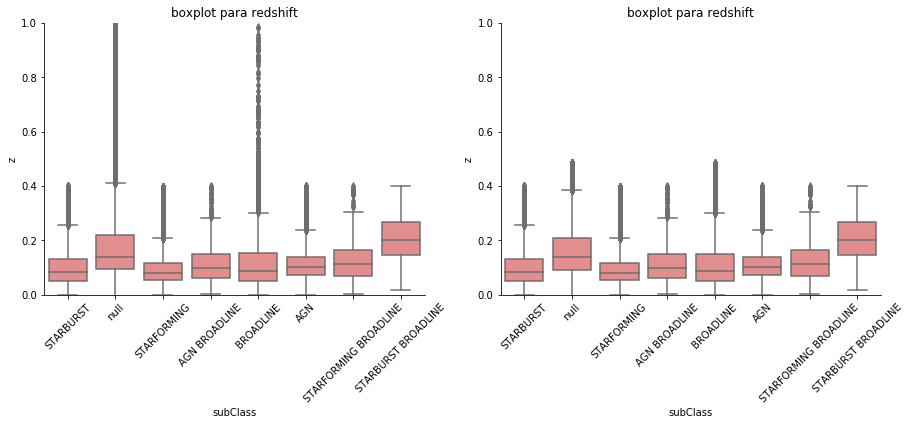

In [53]:
# Gráfico boxplot para identificar outlaiers en la variable "redshift"

plt.figure (figsize=(15,5))

plt.subplot(121)
plt1=seaborn.boxplot(data=data_full, color='lightcoral', x='subClass', y='z')
plt.ylim(0,1)
plt.title('boxplot para redshift')
plt.ylabel('z')
plt.xlabel('subClass')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(122)
plt2=seaborn.boxplot(data=data_clean, color='lightcoral', x='subClass', y='z')
plt.ylim(0,1)
plt.title('boxplot para redshift')
plt.ylabel('z')
plt.xlabel('subClass')
plt.xticks(rotation=45)
seaborn.despine()

### <span style="color:blue"> Vero: Que opinanan??? los filtramos o no??? sugieren filtrar las otras variables tmb???</span>

### **1.5)** Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?

**NOTA:** Las variables más importantes a considerar en este estudio serían las magnitudes de las galaxias, en las distintas bandas fotométricas, así como la posicion angular en el cielo de las mismas y el redshift obtenido a partir de la espectroscopia.

### **1.6)** Implementar herramientas en pos de la reproducibilidad de resultados.

# **Resolución Punto 2 - Análisis estadístico**

* Nos ha contado el especialista que del proceso de adquisición de los mismos se asegura que los datos son correctos y/o completos para aquellos objetos que tienen Magnitudes Pretosian en la banda r entre 14.5 y 17.77. Incluyan esta selección en su análisis.
  * Explorar la base de datos en búsqueda de datos repetidos, en caso de hallarlos elegir la estrategia para su limpieza.
  * Dado que los datos son recolectados a través de mapeos sucesivos del cielo es posible que una galaxia sea observada más de una vez, y en cada observación se le asigne un ID diferente. Propongan una idea para defectar la base de datos de este problema.
       * **Extra**: el especialista en datos no confía en objetos que tengan una separación angular con otro objeto menor a 1" de arco. Intenten limpiar los datos empleando este criterio.
  * Propongan una estrategia para tratar los datos faltantes (en algunas columnas los datos faltantes fueron sustituidos por valores extremos). Quitar o imputar?. Calcular los estadísticos de las distribuciones resultantes.
  * Añadir los campos con los colores calculados tanto para magnitudes petrosian como magnitudes model.
  * En función de las correlaciones observadas en el práctico anterior, y con respecto a nuestra variable objetivo, propongan qué variables se podría excluir del dataset. 
  * Guardar el dataset "limpio" y generar un archivo README que contenga todos los pasos implementados en la curación de los datos.
  * Armen un contenedor de docker con las versiones exactas de todas las bibliotecas utilizadas.